In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_11_2.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_11_2.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(130, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(130, activation = 'relu'),
    tf.keras.layers.Dense(130, activation = 'relu'),
    tf.keras.layers.Dense(130, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/100
100000/100000 - 3s - loss: 0.3483 - accuracy: 0.8552 - val_loss: 0.2844 - val_accuracy: 0.8787
Epoch 2/100
100000/100000 - 2s - loss: 0.2665 - accuracy: 0.8856 - val_loss: 0.2534 - val_accuracy: 0.8900
Epoch 3/100
100000/100000 - 1s - loss: 0.2414 - accuracy: 0.8947 - val_loss: 0.2397 - val_accuracy: 0.8955
Epoch 4/100
100000/100000 - 2s - loss: 0.2195 - accuracy: 0.9050 - val_loss: 0.2094 - val_accuracy: 0.9074
Epoch 5/100
100000/100000 - 2s - loss: 0.1961 - accuracy: 0.9137 - val_loss: 0.1952 - val_accuracy: 0.9131
Epoch 6/100
100000/100000 - 2s - loss: 0.1784 - accuracy: 0.9191 - val_loss: 0.1792 - val_accuracy: 0.9183
Epoch 7/100
100000/100000 - 2s - loss: 0.1651 - accuracy: 0.9236 - val_loss: 0.1648 - val_accuracy: 0.9234
Epoch 8/100
100000/100000 - 2s - loss: 0.1549 - accuracy: 0.9276 - val_loss: 0.1616 - val_accuracy: 0.9246
Epoch 9/100
100000/100000 - 2s - loss: 0.1457 - accuracy: 0.9315 - val_loss: 0.1523 - val_accu

Epoch 77/100
100000/100000 - 1s - loss: 0.0312 - accuracy: 0.9880 - val_loss: 0.0563 - val_accuracy: 0.9798
Epoch 78/100
100000/100000 - 1s - loss: 0.0302 - accuracy: 0.9885 - val_loss: 0.0528 - val_accuracy: 0.9816
Epoch 79/100
100000/100000 - 1s - loss: 0.0292 - accuracy: 0.9888 - val_loss: 0.0539 - val_accuracy: 0.9809
Epoch 80/100
100000/100000 - 1s - loss: 0.0309 - accuracy: 0.9883 - val_loss: 0.0539 - val_accuracy: 0.9814
Epoch 81/100
100000/100000 - 1s - loss: 0.0337 - accuracy: 0.9872 - val_loss: 0.0552 - val_accuracy: 0.9799
Epoch 82/100
100000/100000 - 1s - loss: 0.0312 - accuracy: 0.9882 - val_loss: 0.0493 - val_accuracy: 0.9828
Epoch 83/100
100000/100000 - 1s - loss: 0.0284 - accuracy: 0.9892 - val_loss: 0.0511 - val_accuracy: 0.9824
Epoch 84/100
100000/100000 - 1s - loss: 0.0295 - accuracy: 0.9889 - val_loss: 0.0502 - val_accuracy: 0.9827
Epoch 85/100
100000/100000 - 1s - loss: 0.0302 - accuracy: 0.9886 - val_loss: 0.0447 - val_accuracy: 0.9840
Epoch 86/100
100000/100000 -

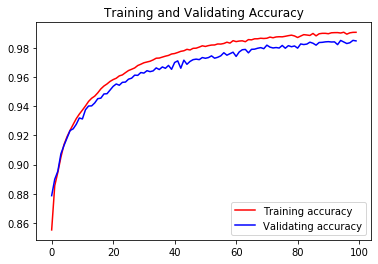

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_11_2_model.h5')